<a href="https://colab.research.google.com/github/hammadnajeeb123/Pinnacle-Full-Stack-datascience-intern/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install kaggle if not already installed
!pip install kaggle

# Upload the kaggle.json file to the appropriate location in Colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Unzip the dataset
!unzip creditcardfraud.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 92% 61.0M/66.0M [00:00<00:00, 123MB/s] 
100% 66.0M/66.0M [00:00<00:00, 93.9MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load the dataset
df = pd.read_csv('/content/creditcard.csv')

# Show the first 5 rows
print(df.head())

# Dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check class distribution (0 = Normal, 1 = Fraud)
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Scale the 'Amount' feature
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Split features (X) and labels (y)
X = df.drop(columns=['Class', 'Time'])  # We drop 'Time' as well because it's not informative for fraud
y = df['Class']


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [7]:
# Use a smaller subset of the training data for faster experimentation
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

# Train the optimized Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=50,       # Reduce the number of trees for faster training
    max_depth=10,          # Limit the depth of each tree to reduce complexity
    n_jobs=-1,             # Use all CPU cores for parallel processing
    random_state=42        # Ensure reproducibility
)

# Fit the model on the smaller subset of the training data
rf_model.fit(X_train_sample, y_train_sample)

# Predictions
rf_preds = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9993562960102056
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.72      0.79       148

    accuracy                           1.00     85443
   macro avg       0.95      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [10]:
# Use a smaller subset of the training data for faster experimentation
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)  # Use 10% of data

# Train the optimized Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=50,       # Reduce the number of boosting rounds
    max_depth=5,           # Limit the depth of each tree to reduce complexity
    learning_rate=0.1,     # Adjust learning rate for faster convergence
    subsample=0.8,         # Use 80% of the training data for fitting
    random_state=42
)

# Fit the model
gb_model.fit(X_train_sample, y_train_sample)

# Predictions
gb_preds = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))


Gradient Boosting Accuracy: 0.9987008883115059
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.61      0.67      0.64       148

    accuracy                           1.00     85443
   macro avg       0.81      0.83      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [11]:
# Train the optimized XGBoost model
xgb_model = XGBClassifier(
    n_estimators=50,         # Reduce the number of boosting rounds
    max_depth=5,             # Limit the depth of each tree to reduce complexity
    learning_rate=0.1,       # Adjust learning rate for faster convergence
    n_jobs=-1,               # Use all available CPU cores for parallel processing
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))



XGBoost Accuracy: 0.9994850368081645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.74      0.83       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [12]:
# Confusion Matrix for Random Forest
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, rf_preds))

# Confusion Matrix for Gradient Boosting
print("Gradient Boosting Confusion Matrix")
print(confusion_matrix(y_test, gb_preds))

# Confusion Matrix for XGBoost
print("XGBoost Confusion Matrix")
print(confusion_matrix(y_test, xgb_preds))


Random Forest Confusion Matrix
[[85282    13]
 [   42   106]]
Gradient Boosting Confusion Matrix
[[85233    62]
 [   49    99]]
XGBoost Confusion Matrix
[[85290     5]
 [   39   109]]


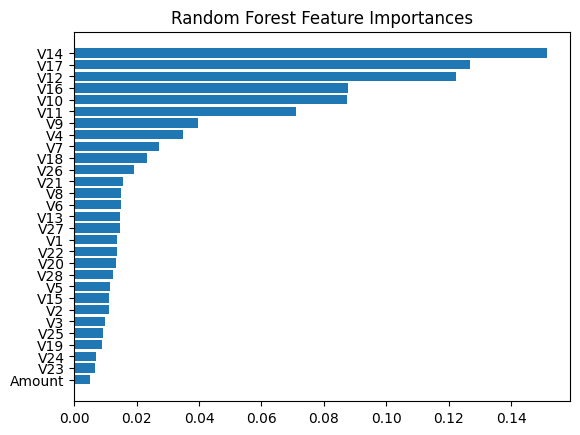

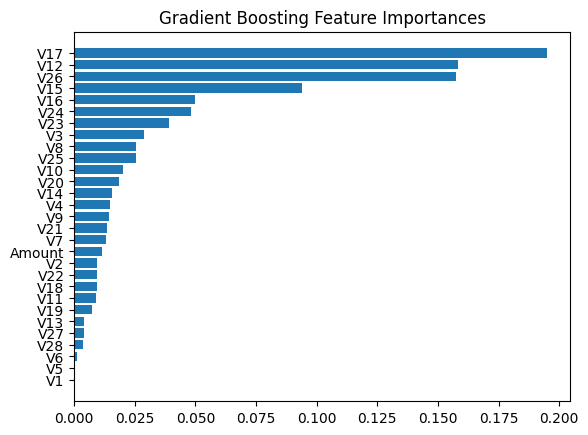

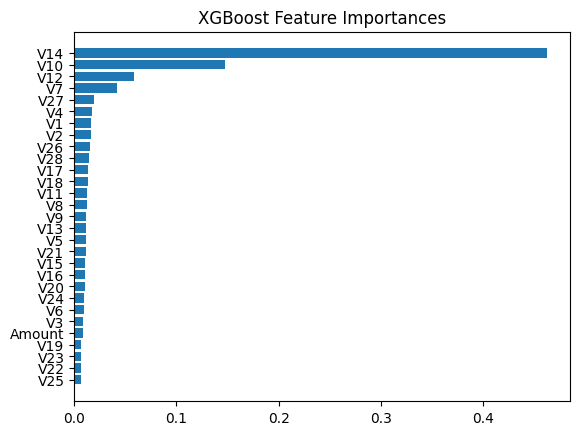

In [13]:
# Feature importance for Random Forest
rf_feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(rf_feature_importances)
plt.barh(range(X.shape[1]), rf_feature_importances[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

# Feature importance for Gradient Boosting
gb_feature_importances = gb_model.feature_importances_
sorted_idx = np.argsort(gb_feature_importances)
plt.barh(range(X.shape[1]), gb_feature_importances[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.title("Gradient Boosting Feature Importances")
plt.show()

# Feature importance for XGBoost
xgb_feature_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(xgb_feature_importances)
plt.barh(range(X.shape[1]), xgb_feature_importances[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.title("XGBoost Feature Importances")
plt.show()
